# MSTICPy Pivot Functions

We recently released a new version of *MSTICPy* with a feature called **Pivot functions**.

This feature has three main goals:
- Making it easy to discover and invoke *MSTICPy* functionality
- Creating a standardized way to call pivotable functions
- Letting you assemble multiple functions into re-usable pipelines.

Here are a couple of examples showing calling different kinds of
enrichment functions from the IpAddress entity:

```python

    >>> from msticpy.datamodel.entities import IpAddress, Host
    >>> IpAddress.util.ip_type(ip_str="157.53.1.1"))
    ip          result
    157.53.1.1  Public

    >>> IpAddress.util.whois("157.53.1.1"))
    asn  asn_cidr  asn_country_code  asn_date    asn_description  asn_registry  nets .....
    NA   NA        US                2015-04-01  NA               arin          [{'cidr': '157.53.0.0/16'...

    >>> IpAddress.util.geoloc_mm(value="157.53.1.1"))
    CountryCode  CountryName    State   City   Longitude   Latitude   Asn...
    US           United States  None    None   -97.822     37.751     None...
```

This second example shows a pivot function that does a data query for host
logon events from a Host entity.

```python
    >>> Host.AzureSentinel.list_host_logons(host_name="VictimPc")
    Account               EventID   TimeGenerated                      Computer                 SubjectUserName   SubjectDomainName
    NT AUTHORITY\SYSTEM   4624      2020-10-01 22:39:36.987000+00:00   VictimPc.Contoso.Azure   VictimPc$         CONTOSO
    NT AUTHORITY\SYSTEM   4624      2020-10-01 22:39:37.220000+00:00   VictimPc.Contoso.Azure   VictimPc$         CONTOSO
    NT AUTHORITY\SYSTEM   4624      2020-10-01 22:39:42.603000+00:00   VictimPc.Contoso.Azure   VictimPc$         CONTOSO
```

The pivot functionality exposes operations relevant to a particular
entity as methods (or functions) of that entity. These operations include:

-  Data queries
-  Threat intelligence lookups
-  Other data lookups such as geo-location or domain resolution
-  and other local functionality

You can also add other functions from 3rd party Python packages or
ones you write yourself as pivot functions.


## Terminology
Before we get into things let's clear up a few terms.

### Entities
These are Python classes that represent real-world objects
commonly encountered in CyberSec investigations and hunting. E.g. Host,
URL, IP Address, Account, etc.

### Pivoting
This comes from the common practice in CyberSec investigations
of navigating from one suspect entity to another. E.g. you might start
with an alert identifying a potentially malicious IP Address, from there you
'pivot' to see which hosts or accounts were communicating with that 
address. From there you might pivot again to look at processes running on
the host or Office activity for the account.

## Background Reading

This article is available in Notebook form so that you can try out the examples. [TODO]

There is also full documenation of the Pivot functionality on our [ReadtheDocs page](https://msticpy.readthedocs.io/en/latest/data_analysis/PivotFunctions.html)

<hr>

## Life before pivot functions

Before Pivot functions your ability to use the various bits of
functionality in *MSTICPy* was always bounded by you knowledge of
where a certain function was (or your enthusiasm for reading the docs).

For example, suppose you had an IP address that you wanted to do 
some simple enrichment on.

In [2]:
ip_addr = "20.72.193.242"

First you'd need to locate and import the functions. There
might also be (as in the GeoIPLiteLookup class) some initialization
step you'd need to do before using the functionality.

In [3]:
from msticpy.sectools.ip_utils import get_ip_type
from msticpy.sectools.ip_utils import get_whois_info
from msticpy.sectools.geoip import GeoLiteLookup
geoip = GeoLiteLookup()

Next you might have to check the help for each function to
work it parameters.

In [4]:
help(get_ip_type)

Help on function get_ip_type in module msticpy.sectools.ip_utils:

get_ip_type(ip: str = None, ip_str: str = None) -> str
    Validate value is an IP address and deteremine IPType category.
    
    (IPAddress category is e.g. Private/Public/Multicast).
    
    Parameters
    ----------
    ip : str
        The string of the IP Address
    ip_str : str
        The string of the IP Address - alias for `ip`
    
    Returns
    -------
    str
        Returns ip type string using ip address module



Then finally run the functions

In [5]:
get_ip_type(ip_addr)

'Public'

In [6]:
get_whois_info(ip_addr)

('MICROSOFT-CORP-MSN-AS-BLOCK, US',
 {'nir': None,
  'asn_registry': 'arin',
  'asn': '8075',
  'asn_cidr': '20.64.0.0/10',
  'asn_country_code': 'US',
  'asn_date': '2017-10-18',
  'asn_description': 'MICROSOFT-CORP-MSN-AS-BLOCK, US',
  'query': '20.72.193.242',
  'nets': [{'cidr': '20.34.0.0/15, 20.128.0.0/16, 20.40.0.0/13, 20.33.0.0/16, 20.64.0.0/10, 20.36.0.0/14, 20.48.0.0/12',
    'name': 'MSFT',
    'handle': 'NET-20-33-0-0-1',
    'range': '20.33.0.0 - 20.128.255.255',
    'description': 'Microsoft Corporation',
    'country': 'US',
    'state': 'WA',
    'city': 'Redmond',
    'address': 'One Microsoft Way',
    'postal_code': '98052',
    'emails': ['msndcc@microsoft.com',
     'IOC@microsoft.com',
     'abuse@microsoft.com'],
    'created': '2017-10-18',
    'updated': '2017-10-18'}],
  'raw': None,
  'referral': None,
  'raw_referral': None})

In [8]:
geoip.lookup_ip(ip_addr)

([{'continent': {'code': 'NA',
    'geoname_id': 6255149,
    'names': {'de': 'Nordamerika',
     'en': 'North America',
     'es': 'Norteamérica',
     'fr': 'Amérique du Nord',
     'ja': '北アメリカ',
     'pt-BR': 'América do Norte',
     'ru': 'Северная Америка',
     'zh-CN': '北美洲'}},
   'country': {'geoname_id': 6252001,
    'iso_code': 'US',
    'names': {'de': 'USA',
     'en': 'United States',
     'es': 'Estados Unidos',
     'fr': 'États-Unis',
     'ja': 'アメリカ合衆国',
     'pt-BR': 'Estados Unidos',
     'ru': 'США',
     'zh-CN': '美国'}},
   'location': {'accuracy_radius': 1000,
    'latitude': 47.6032,
    'longitude': -122.3412,
    'time_zone': 'America/Los_Angeles'},
   'registered_country': {'geoname_id': 6252001,
    'iso_code': 'US',
    'names': {'de': 'USA',
     'en': 'United States',
     'es': 'Estados Unidos',
     'fr': 'États-Unis',
     'ja': 'アメリカ合衆国',
     'pt-BR': 'Estados Unidos',
     'ru': 'США',
     'zh-CN': '美国'}},
   'subdivisions': [{'geoname_id': 581513

At which point you'd discover that the output from each
function was somewhat raw and it would take a bit more
work if you wanted to combine it in any way (say in a single table).

We'll see how pivot functions address these problems in the remainder
of the notebook.

## Getting Started with Pivot functions
Typically we use *MSTICPy*'s `init_notebook` function that handles
checking versions and importing some commonly-used packages and modules
(both *MSTICPy* and 3rd party packages like *pandas*

In [1]:
from msticpy.nbtools.nbinit import init_notebook
init_notebook(namespace=globals());

Processing imports....
Checking configuration....
No errors found.
No warnings found.
Setting notebook options....


There are some preliminary steps needed before you can use
pivot functions. The main one is loading the `Pivot` class.
Pivot functions are added to the entities dynamically. The Pivot
class will try to discover relevant functions from queries, 
Threat Intel providers and various utility functions.

In some cases, notably data queries, the data query functions
are themselves created dynamically, so these need to be loaded
before you create the Pivot class. (You can always create a new instance
of this class, which forces re-discovery, so don't worry if mess up
the order of things).

> Note in most cases we don't need to connect/authenticate to
> a data provider prior to loading *Pivot*

Let's load our data query provider for AzureSentinel

In [9]:
az_provider = QueryProvider("AzureSentinel")

Please wait. Loading Kqlmagic extension...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Now we can load and instantiate the Pivot class.

Why do we need to pass `namespace=globals()`?
Pivot searches through the current objects defined in the Python/notebook
namespace. This is most relevant for QueryProviders. In most other cases
(like GeoIP and ThreatIntel providers, it will create new ones if it
can't find existing ones).

In [10]:
from msticpy.datamodel.pivot import Pivot
pivot = Pivot(namespace=globals())

Using Open PageRank. See https://www.domcop.com/openpagerank/what-is-openpagerank


## Easy discovery of functionality

### Find the entity name you need

The simplest way to do this is simply enumerate (`dir`) the
contents of the *MSTPCPy* entities sub-package. This should
have already been imported by the `init_notebook` function that
we ran earlier.

The items at the beginning of the list with proper capitalization are
the entities.

In [11]:
dir(entities)

['Account',
 'Alert',
 'Algorithm',
 'AzureResource',
 'CloudApplication',
 'Dns',
 'ElevationToken',
 'Entity',
 'File',
 'FileHash',
 'GeoLocation',
 'Host',
 'HostLogonSession',
 'IpAddress',
 'Malware',
 'NetworkConnection',
 'OSFamily',
 'Process',
 'RegistryHive',
 'RegistryKey',
 'RegistryValue',
 'SecurityGroup',
 'Threatintelligence',
 'UnknownEntity',
 'Url',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'account',
 'alert',
 'azure_resource',
 'cloud_application',
 'difflib',
 'dns',
 'entity',
 'entity_enums',
 'entity_graph',
 'file',
 'file_hash',
 'find_entity',
 'geo_location',
 'host',
 'host_logon_session',
 'ip_address',
 'malware',
 'network_connection',
 'process',
 'registry_key',
 'registry_value',
 'security_group',
 'threat_intelligence',
 'unknown_entity',
 'url']

We're going to make this a little easier in a forthcoming
update with this helper function.
> <p style="color:red"><b>Warning:</b> post-0.9.0 functionality</p>
> This will throw and error in v0.9.0 of MSTICPy

In [12]:
entities.find_entity("ip")

Match found 'IpAddress'


msticpy.datamodel.entities.ip_address.IpAddress

In [13]:
entities.find_entity("azure")

No exact match found for 'azure'. 
Closest matches are 'AzureResource', 'Url', 'Malware'


## Listing pivot functions available for an entity

Note you can always address an entity using its qualified
path, e.g. `entities.IpAddress` but if you are going
to use one or two entities a lot it will save a bit of typing
if you import them explicitly.


In [83]:
from msticpy.datamodel.entities import IpAddress, Host

Once you have the entity you can use the `get_pivot_list()`
function to see which pivot functions are available for it.

In [84]:
IpAddress.get_pivot_list()

['AzureSentinel.SecurityAlert_list_alerts_for_ip',
 'AzureSentinel.SigninLogs_list_aad_signins_for_ip',
 'AzureSentinel.AzureActivity_list_azure_activity_for_ip',
 'AzureSentinel.AzureNetworkAnalytics_CL_list_azure_network_flows_by_ip',
 'AzureSentinel.OfficeActivity_list_activity_for_ip',
 'AzureSentinel.AzureNetworkAnalytics_CL_get_host_for_ip',
 'AzureSentinel.Heartbeat_get_heartbeat_for_ip',
 'AzureSentinel.Heartbeat_get_info_by_ipaddress',
 'AzureSentinel.Syslog_list_logons_for_source_ip',
 'AzureSentinel.ThreatIntelligenceIndicator_list_indicators',
 'AzureSentinel.ThreatIntelligenceIndicator_list_indicators_by_ip',
 'AzureSentinel.ThreatIntelligenceIndicator_list_indicators_by_hash',
 'AzureSentinel.ThreatIntelligenceIndicator_list_indicators_by_filepath',
 'AzureSentinel.ThreatIntelligenceIndicator_list_indicators_by_domain',
 'AzureSentinel.ThreatIntelligenceIndicator_list_indicators_by_email',
 'AzureSentinel.ThreatIntelligenceIndicator_list_indicators_by_url',
 'ti.lookup_ip

Some of the function names are a little unweildy but, in 
many cases, this is necessary to avoid name collisions.
You might notice from the list that the functions are
grouped into containers "AzureSentinel", "ti" and "util" in 
the above example.

Although this makes the function name even longer we thought
that this helped to keep related functionality together - so
you don't get a TI lookup, when you thought you were running
a query.

Fortunately Jupyter notebooks/IPython support tab completion
so you should not normally have to remember these names.


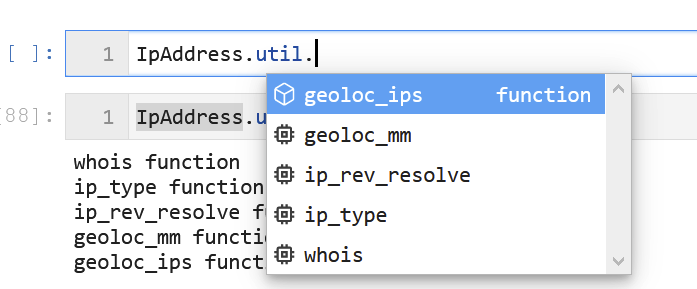

The containers ("AzureSentinel", "util", etc.) are also callable
functions - they just return the list of functions they contain.

In [88]:
IpAddress.util()

whois function
ip_type function
ip_rev_resolve function
geoloc_mm function
geoloc_ips function


Now we're ready to run any of the functions for this entity

In [14]:
IpAddress.util.ip_type(ip_addr)

,ip,result
0,20.72.193.242,Public


In [15]:
entities.IpAddress.util.whois(ip_addr)

,asn,asn_cidr,asn_country_code,asn_date,asn_description,asn_registry,nets,nir,query,raw,raw_referral,referral
0,8075,20.64.0.0/10,US,2017-10-18,"MICROSOFT-CORP-MSN-AS-BLOCK, US",arin,"[{'cidr': '20.128.0.0/16, 20.48.0.0/12, 20.40.0.0/13, 20.33.0.0/16, 20.36.0.0/14, 20.34.0.0/15, ...",None,20.72.193.242,None,None,None


In [16]:
entities.IpAddress.util.ip_rev_resolve(ip_addr)

,qname,rdtype,response,ip_address
0,20.72.193.242,PTR,The DNS query name does not exist: 20.72.193.242.,20.72.193.242


In [17]:
entities.IpAddress.util.geoloc_mm(ip_addr)

,CountryCode,CountryName,State,City,Longitude,Latitude,Asn,edges,Type,AdditionalData,IpAddress
0,US,United States,Washington,None,-122.3412,47.6032,None,{},geolocation,{},20.72.193.242


In [18]:
entities.IpAddress.ti.lookup_ip(ip_addr)

,Ioc,IocType,SafeIoc,QuerySubtype,Provider,Result,Severity,Details,RawResult,Reference,Status
0,20.72.193.242,ipv4,20.72.193.242,None,Tor,True,information,Not found.,None,https://check.torproject.org/exit-addresses,0
0,20.72.193.242,ipv4,20.72.193.242,None,VirusTotal,True,unknown,"{'verbose_msg': 'Missing IP address', 'response_code': 0}","{'response_code': 0, 'verbose_msg': 'Missing IP address'}",https://www.virustotal.com/vtapi/v2/ip-address/report,0
0,20.72.193.242,ipv4,20.72.193.242,None,XForce,True,warning,"{'score': 1, 'cats': {}, 'categoryDescriptions': {}, 'reason': 'Regional Internet Registry', 're...","{'ip': '20.72.193.242', 'history': [{'created': '2012-03-22T07:26:00.000Z', 'reason': 'Regional ...",https://api.xforce.ibmcloud.com/ipr/20.72.193.242,0


Notice that we didn't need to worry about either the parameter
name or format (more on this in the next section). Also, 
whatever the function, the output is always returned
as a pandas DataFrame.

### For Data query functions you *do* need to worry about the parameter name
Data query functions are a little more complex than most other functions
and specifically often support many parameters. Rather than try
to guess which parameter you meant, we require you to be explicit.

To use a data query, we need to authenticate to the provider.

In [19]:
az_provider.connect(WorkspaceConfig(workspace="CyberSecuritySoc").code_connect_str)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

If you are not sure of the parameters required by the query
you can use the built-in help

In [90]:
Host.AzureSentinel.SecurityAlert_list_related_alerts?

Signature: Host.AzureSentinel.SecurityAlert_list_related_alerts(*args, **kwargs) -> Union[pandas.core.frame.DataFrame, Any]
Docstring:
Retrieves list of alerts with a common host, account or process

Parameters
----------
account_name: str (optional)
    The account name to find
add_query_items: str (optional)
    Additional query clauses
end: datetime (optional)
    Query end time
host_name: str (optional)
    The hostname to find
path_separator: str (optional)
    Path separator
    (default value is: \\)
process_name: str (optional)
    The process name to find
query_project: str (optional)
    Column project statement
    (default value is:  | project-rename StartTimeUtc = StartTime, EndTim...)
start: datetime (optional)
    Query start time
    (default value is: -30)
subscription_filter: str (optional)
    Optional subscription/tenant filter expression
    (default value is: true)
table: str (optional)
    Table name
    (default value is: SecurityAlert)
File:      c:\users\ian\a

In [92]:
Host.AzureSentinel.SecurityAlert_list_related_alerts(host_name="victim00").head(5)

<IPython.core.display.Javascript object>

,TenantId,TimeGenerated,AlertDisplayName,AlertName,Severity,Description,ProviderName,VendorName,VendorOriginalId,SystemAlertId,ResourceId,SourceComputerId,AlertType,ConfidenceLevel,ConfidenceScore,IsIncident,StartTimeUtc,EndTimeUtc,ProcessingEndTime,RemediationSteps,ExtendedProperties,Entities,SourceSystem,WorkspaceSubscriptionId,WorkspaceResourceGroup,ExtendedLinks,ProductName,ProductComponentName,AlertLink,Status,CompromisedEntity,Tactics,Type,Computer,src_hostname,src_accountname,src_procname,host_match,acct_match,proc_match
0,8ecf8077-cf51-4820-aadd-14040956f35d,2020-12-10 09:10:08+00:00,Suspected credential theft activity,Suspected credential theft activity,Medium,This program exhibits suspect characteristics potentially associated with credential theft. Onc...,MDATP,Microsoft,da637426874826633442_-1480645585,a429998b-8a1f-a69c-f2b8-24dedde31c2d,,,WindowsDefenderAtp,,NaN,False,2020-12-04 14:00:00+00:00,2020-12-04 14:00:00+00:00,2020-12-10 09:10:08+00:00,"[\r\n ""1. Make sure the machine is completely updated and all your software has the latest patc...","{\r\n ""MicrosoftDefenderAtp.Category"": ""CredentialAccess"",\r\n ""MicrosoftDefenderAtp.Investiga...","[\r\n {\r\n ""$id"": ""4"",\r\n ""DnsDomain"": ""na.contosohotels.com"",\r\n ""HostName"": ""vict...",Detection,,,,Microsoft Defender Advanced Threat Protection,,https://securitycenter.microsoft.com/alert/da637426874826633442_-1480645585,New,victim00.na.contosohotels.com,CredentialAccess,SecurityAlert,victim00,victim00,,,True,False,False
1,8ecf8077-cf51-4820-aadd-14040956f35d,2020-12-10 09:10:08+00:00,'Mimikatz' hacktool was detected,'Mimikatz' hacktool was detected,Low,"Readily available tools, such as hacking programs, can be used by unauthorized individuals to sp...",MDATP,Microsoft,da637426874826014018_-1390662053,edb68e6d-012d-4c6b-7408-20e679fb41c8,,,WindowsDefenderAv,,NaN,False,2020-12-04 14:00:01+00:00,2020-12-04 14:00:01+00:00,2020-12-10 09:10:08+00:00,"[\r\n ""1. Make sure the machine is completely updated and all your software has the latest patc...","{\r\n ""MicrosoftDefenderAtp.Category"": ""Malware"",\r\n ""MicrosoftDefenderAtp.InvestigationId"": ...","[\r\n {\r\n ""$id"": ""4"",\r\n ""DnsDomain"": ""na.contosohotels.com"",\r\n ""HostName"": ""vict...",Detection,,,,Microsoft Defender Advanced Threat Protection,,https://securitycenter.microsoft.com/alert/da637426874826014018_-1390662053,New,victim00.na.contosohotels.com,Unknown,SecurityAlert,victim00,victim00,,,True,False,False
2,8ecf8077-cf51-4820-aadd-14040956f35d,2020-12-10 09:10:08+00:00,Malicious credential theft tool execution detected,Malicious credential theft tool execution detected,High,A known credential theft tool execution command line was detected.\nEither the process itself or...,MDATP,Microsoft,da637426874824572229_-192666782,39912e77-045b-a082-a91e-8a18958d1b1c,,,WindowsDefenderAtp,,NaN,False,2020-12-04 14:00:00+00:00,2020-12-04 14:00:00+00:00,2020-12-10 09:10:08+00:00,"[\r\n ""1. Make sure the machine is completely updated and all your software has the latest patc...","{\r\n ""MicrosoftDefenderAtp.Category"": ""CredentialAccess"",\r\n ""MicrosoftDefenderAtp.Investiga...","[\r\n {\r\n ""$id"": ""4"",\r\n ""DnsDomain"": ""na.contosohotels.com"",\r\n ""HostName"": ""vict...",Detection,,,,Microsoft Defender Advanced Threat Protection,,https://securitycenter.microsoft.com/alert/da637426874824572229_-192666782,New,victim00.na.contosohotels.com,CredentialAccess,SecurityAlert,victim00,victim00,,,True,False,False
3,8ecf8077-cf51-4820-aadd-14040956f35d,2020-12-10 10:10:17+00:00,Malicious credential theft tool execution detected,Malicious credential theft tool execution detected,High,A known credential theft tool execution command line was detected.\nEither the process itself or...,MDATP,Microsoft,da637426874824572229_-192666782,39912e77-045b-a082-a91e-8a18958d1b1c,,,WindowsDefenderAtp,,NaN,False,2020-12-04 14:00:00+00:00,2020-12-04 14:00:00+00:00,2020-12-10 10:10:17+00:00,"[\r\n ""1. Make sure the 

We also have a preview of a notebook tool that lets you
browser around entities and their pivot functions, search
for a function by keyword and view the help for that function.
This is going to be released shortly.

> <p style="color:red"><b>Warning:</b> post-0.9.0 functionality</p>
> This will throw and error in v0.9.0 of MSTICPy

In [26]:
Pivot.browse()

## Standardized way of calling Pivot functions

Due to various factors (historical, underlying data,
developer laziness and forgetfullness, etc.) the functionality
in *MSTICPy* can be inconsistent in the way it uses input
parameters.

Also, many functions will only accept inputs as a single
value, or a list or a DataFrame or some unpredictable combination
of these.

Pivot functions allow you to largely forget about this - you
can use the same function whether you have:
- a single value
- a list (or any iterable) of values
- a DataFrame with the input value in one of the columns.

Let's take an example. 

Suppose we have a set of IP addresses pasted
from somewhere that we want to use as input.

We need to convert this into a Python data object of some sort.
To do this we can use another Pivot utility `%%txt2df`. This is a
Jupyter/IPython magic function so you can just paste you data in
a cell.
Use `%%txt2df --help` in an empty cell to see the full syntax.

The example below we specify a comma separator, that the
data has a headers row and to save the converted data as
a DataFrame named "ip_df".

> Warning this will overwrite any existing variable of this
name

In [104]:
%%txt2df --sep , --headers --name ip_df
idx, ip, type
0, 172.217.15.99, Public
1, 40.85.232.64, Public
2, 20.38.98.100, Public
3, 23.96.64.84, Public
4, 65.55.44.108, Public
5, 131.107.147.209, Public
6, 10.0.3.4, Private
7, 10.0.3.5, Private
8, 13.82.152.48, Public


,idx,ip,type
0,0,172.217.15.99,Public
1,1,40.85.232.64,Public
2,2,20.38.98.100,Public
3,3,23.96.64.84,Public
4,4,65.55.44.108,Public
5,5,131.107.147.209,Public
6,6,10.0.3.4,Private
7,7,10.0.3.5,Private
8,8,13.82.152.48,Public


For our example we'll also create a standard Python list
from the ip column.

In [106]:
ip_list = list(ip_df.ip)
print(ip_list)

['172.217.15.99', '40.85.232.64', '20.38.98.100', '23.96.64.84', '65.55.44.108', '131.107.147.209', '10.0.3.4', '10.0.3.5', '13.82.152.48']


### How did this work before?

If you recall the earlier example of `get_ip_type`, passing it
a list or DataFrame doesn't result in anything useful.

In [30]:
get_ip_type(ip_list)

['172.217.15.99', '40.85.232.64', '20.38.98.100', '23.96.64.84', '65.55.44.108', '131.107.147.209', '10.0.3.4', '10.0.3.5', '13.82.152.48'] does not appear to be an IPv4 or IPv6 address


'Unspecified'

### Pivot versions are (somewhat) agnostic to input data format

However, the pivotized version can accept and correctly process
a list

In [107]:
IpAddress.util.ip_type(ip_list)

,ip,result
0,172.217.15.99,Public
1,40.85.232.64,Public
2,20.38.98.100,Public
3,23.96.64.84,Public
4,65.55.44.108,Public
5,131.107.147.209,Public
6,10.0.3.4,Private
7,10.0.3.5,Private
8,13.82.152.48,Public


In the case of a DataFrame, things are a little more
complicated - we have to tell the function 
the name of the column that
contains the input data.

In [32]:
IpAddress.util.whois(ip_df)  # won't work!

KeyError: ("'ip_column' is not in the input dataframe", 'Please specify the column when calling the function.You can use one of the parameter names for this:', ['column', 'input_column', 'input_col', 'src_column', 'src_col'])

In [108]:
IpAddress.util.whois(ip_df, column="ip")  # correct

,nir,asn_registry,asn,asn_cidr,asn_country_code,asn_date,asn_description,query,nets,raw,referral,raw_referral
0,NaN,arin,15169,172.217.15.0/24,US,2012-04-16,"GOOGLE, US",172.217.15.99,"[{'cidr': '172.217.0.0/16', 'name': 'GOOGLE', 'handle': 'NET-172-217-0-0-1', 'range': '172.217.0...",NaN,NaN,NaN
1,NaN,arin,8075,40.80.0.0/12,US,2015-02-23,"MICROSOFT-CORP-MSN-AS-BLOCK, US",40.85.232.64,"[{'cidr': '40.80.0.0/12, 40.124.0.0/16, 40.125.0.0/17, 40.74.0.0/15, 40.120.0.0/14, 40.76.0.0/14...",NaN,NaN,NaN
2,NaN,arin,8075,20.36.0.0/14,US,2017-10-18,"MICROSOFT-CORP-MSN-AS-BLOCK, US",20.38.98.100,"[{'cidr': '20.64.0.0/10, 20.40.0.0/13, 20.34.0.0/15, 20.128.0.0/16, 20.36.0.0/14, 20.48.0.0/12, ...",NaN,NaN,NaN
3,NaN,arin,8075,23.96.0.0/14,US,2013-06-18,"MICROSOFT-CORP-MSN-AS-BLOCK, US",23.96.64.84,"[{'cidr': '23.96.0.0/13', 'name': 'MSFT', 'handle': 'NET-23-96-0-0-1', 'range': '23.96.0.0 - 23....",NaN,NaN,NaN
4,NaN,arin,8075,65.52.0.0/14,US,2001-02-14,"MICROSOFT-CORP-MSN-AS-BLOCK, US",65.55.44.108,"[{'cidr': '65.52.0.0/14', 'name': 'MICROSOFT-1BLK', 'handle': 'NET-65-52-0-0-1', 'range': '65.52...",NaN,NaN,NaN
5,NaN,arin,3598,131.107.0.0/16,US,1988-11-11,"MICROSOFT-CORP-AS, US",131.107.147.209,"[{'cidr': '131.107.0.0/16', 'name': 'MICROSOFT', 'handle': 'NET-131-107-0-0-1', 'range': '131.10...",NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,arin,8075,13.64.0.0/11,US,2015-03-26,"MICROSOFT-CORP-MSN-AS-BLOCK, US",13.82.152.48,"[{'cidr': '13.96.0.0/13, 13.104.0.0/14, 13.64.0.0/11', 'name': 'MSFT', 'handle': 'NET-13-64-0-0-...",NaN,NaN,NaN


> Note: for most functions you can ignore the parameter
name and just specify it as a positional parameter.
You can also use the original parameter name of the underlying
function or the placeholder name "value".

The following are all equivalent:
```python
IpAddress.util.ip_type(ip_list)
IpAddress.util.ip_type(ip_str=ip_list)
IpAddress.util.ip_type(value=ip_list)
IpAddress.util.ip_type(data=ip_list)
```

When passing both a DataFrame and column name use:
```python
IpAddress.util.ip_type(data=ip_df, column="col_name")
```
You can also pass an entity instance of an entity
as a input parameter. The pivot code knows which attribute
or attributes of an entity will provider the input value.

In [114]:
ip_entity = IpAddress(Address="40.85.232.64")
IpAddress.util.ip_type(ip_entity)

,ip,result
0,40.85.232.64,Public


### Iterable/DataFrame inputs and single-value functions

Many of the underlying functions only accept single values
as inputs. Examples of these are the data query functions - typically
they expect a single host name, IP address, etc.

Pivot knows about the type of parameters that the function accepts.
It will adjust the input to match the expectations of the underlying
function. If a list or DataFrame is passed as input to a single-value
function Pivot will split the input and call the function once for
each value. It then combines the output into a single DataFrame
before returning the results. 

You can read a bit more about how this is done in the Appendix TODO

### Data queries - where does the time range come from?

The Pivot class has a buit-in time range. This is used by
default for all queries. Don't worry - you can change it easily

In [45]:
Pivot.current.timespan

TimeStamp(start=2021-02-15 21:01:40.381864, end=2021-02-16 21:01:40.381864, period=-1 day, 0:00:00)

You can edit the time range interactively

In [46]:
Pivot.current.edit_query_time()

Or by setting the timespan property directly

In [47]:
from msticpy.common.timespan import TimeSpan
# TimeSpan accepts datetimes or datestrings
timespan = TimeSpan(start="02/01/2021", end="02/15/2021")
Pivot.current.timespan = timespan

TimeStamp(start=2021-02-01 00:00:00, end=2021-02-15 00:00:00, period=-14 days +00:00:00)

In an upcoming release there is also a convenience function
for setting the time directly with Python datetimes or date strings
> <b><p style="color:red">Warning:</p></b> post-0.9.0 functionality</br>
> This will throw and error in v0.9.0 of MSTICPy

In [49]:
Pivot.current.set_timespan(start="2020-02-06 03:00:00", end="2021-02-15 01:42:42")

You can also override the built-in time settings by specifying
`start` and `end` as parameters.

In [ ]:
Host.AzureSentinel.SecurityAlert_list_related_alerts(host_name="victim00", start=dt1, end=dt2)

### Supplying extra parameters

The Pivot layer will pass any unused keyword parameters to the
underlying function. This *does not* usually apply to positional parameters -
if you want parameters to get to the function, you have to name them
explicitly.
In this example the `add_query_items` parameter is passed to the underlying
query function

In [50]:
entities.Host.AzureSentinel.SecurityEvent_list_host_logons(
    host_name="victimPc",
    add_query_items="| summarize count() by LogonType"
)

<IPython.core.display.Javascript object>

,LogonType,count_
0,5,27492
1,4,12597
2,3,6936
3,2,173
4,10,58
5,9,8
6,0,19
7,11,1


## Pivot Pipelines

Because all pivot functions accept DataFrames as input
and produce DataFrames as output, it means that it is possible
to chain pivot functions into a pipeline.

### Joining input to output
You can join the input to the output. This usually only makes sense
when the input is a DataFrame. It
lets you keep the previously accumumated results and tag on the
additional columns produced by the pivot function you are calling.

The `join` parameter supports "inner", "left", "right" and "outer"
joins (be careful with the latter though!)
See [pivot joins documentation](https://msticpy.readthedocs.io/en/latest/data_analysis/PivotFunctions.html#joining-input-to-output-data)

Although joining is useful in pipelines you can use it on
any function whether in a pipeline or not.

In [34]:
entities.IpAddress.util.whois(ip_df, column="ip", join="inner")

,idx,ip,type,nir,asn_registry,asn,asn_cidr,asn_country_code,asn_date,asn_description,query,nets,raw,referral,raw_referral
0,0,172.217.15.99,Public,NaN,arin,15169,172.217.15.0/24,US,2012-04-16,"GOOGLE, US",172.217.15.99,"[{'cidr': '172.217.0.0/16', 'name': 'GOOGLE', 'handle': 'NET-172-217-0-0-1', 'range': '172.217.0...",NaN,NaN,NaN
1,1,40.85.232.64,Public,NaN,arin,8075,40.80.0.0/12,US,2015-02-23,"MICROSOFT-CORP-MSN-AS-BLOCK, US",40.85.232.64,"[{'cidr': '40.80.0.0/12, 40.124.0.0/16, 40.125.0.0/17, 40.74.0.0/15, 40.120.0.0/14, 40.76.0.0/14...",NaN,NaN,NaN
2,2,20.38.98.100,Public,NaN,arin,8075,20.36.0.0/14,US,2017-10-18,"MICROSOFT-CORP-MSN-AS-BLOCK, US",20.38.98.100,"[{'cidr': '20.64.0.0/10, 20.40.0.0/13, 20.34.0.0/15, 20.128.0.0/16, 20.36.0.0/14, 20.48.0.0/12, ...",NaN,NaN,NaN
3,3,23.96.64.84,Public,NaN,arin,8075,23.96.0.0/14,US,2013-06-18,"MICROSOFT-CORP-MSN-AS-BLOCK, US",23.96.64.84,"[{'cidr': '23.96.0.0/13', 'name': 'MSFT', 'handle': 'NET-23-96-0-0-1', 'range': '23.96.0.0 - 23....",NaN,NaN,NaN
4,4,65.55.44.108,Public,NaN,arin,8075,65.52.0.0/14,US,2001-02-14,"MICROSOFT-CORP-MSN-AS-BLOCK, US",65.55.44.108,"[{'cidr': '65.52.0.0/14', 'name': 'MICROSOFT-1BLK', 'handle': 'NET-65-52-0-0-1', 'range': '65.52...",NaN,NaN,NaN
5,5,131.107.147.209,Public,NaN,arin,3598,131.107.0.0/16,US,1988-11-11,"MICROSOFT-CORP-AS, US",131.107.147.209,"[{'cidr': '131.107.0.0/16', 'name': 'MICROSOFT', 'handle': 'NET-131-107-0-0-1', 'range': '131.10...",NaN,NaN,NaN
6,8,13.82.152.48,Public,NaN,arin,8075,13.64.0.0/11,US,2015-03-26,"MICROSOFT-CORP-MSN-AS-BLOCK, US",13.82.152.48,"[{'cidr': '13.96.0.0/13, 13.104.0.0/14, 13.64.0.0/11', 'name': 'MSFT', 'handle': 'NET-13-64-0-0-...",NaN,NaN,NaN


<hr>

### Pipelines 

Pivot pipelines are implemented pandas customr accessors.
Read more about [Extending pandas here](https://pandas.pydata.org/pandas-docs/stable/development/extending.html)

When you load Pivot it adds the `mp_pivot` accessor. This
appears as an attribute to DataFrames.

```python
>>> ips_df.mp_pivot
<msticpy.datamodel.pivot_pd_accessor.PivotAccessor at 0x275754e2208>
```

The main pipelining function `run` is a method of `mp_pivot`.
`run` requires two parameters - the pivot function to run and
the column to use as input. See [mp_pivot.run documentation](https://msticpy.readthedocs.io/en/latest/data_analysis/PivotFunctions.html#mp-pivot-run)

Here is an example of using it to call 4 pivot functions, each
using the output of the previous function as input and using
the `join` parameter to accumulate the results from each
stage.

Let's step through it line by line.
1. The whole thing is surrounded by a pair of parentheses - this is just
   to let us split the whole expression over multiple lines without
   Python complaining.
2. Next we have `ips_df` - this is just the starting DataFrame, our input data.
3. Next we call the `mp_pivot.run()` accessor method on this dataframe.
   We pass it the pivot function that we want to run and the input column name.
   This column name is the column in ips_df where our input IP addresses are.
   We've also specified an `join` type of inner. In this case the join type doesn't
   really matter since we know we get exactly one output row for every input row.
4. We're using the pandas `query` function to filter out unwanted entries
   from the previous stage. In this case we only want Public IP addresses. 
   This illustrates that you can intersperse standard pandas functions
   in the same pipeline. We could have also added a column selector expression
   ([["col1", "col2"...]]) if we wanted to filter the columns passed to the 
   next stage
5. We are calling a further pivot function - `whois`. Remember the "column" parameter
   always refers to the input column, i.e. the column from previous stage
   that we want to use in this stage.
6. We are calling `geoloc_mm` to get geo location details joining with a left
   join - this preserves the input data rows and adds null columns in any cases
   where the pivot function returned no result.
7. Is the same as 6 except is a data query to see if we have any alerts
   that contain these IP addresses. Remember, in the case of data queries
   we have to name the specific query parameter that we want the input to 
   go to. In this case, each row value in the "ip" column from the previous
   stage will be sent to the query.
8. Finally we close the parentheses to form a valid Python expression.
   The whole expression returns a DataFrame so we can add further pandas
   operations here (like `.head(5)` shown here).

In [128]:
ip_list = [
    "192.168.40.32",
    "192.168.1.216",
    "192.168.153.17",
    "3.88.48.125",
    "10.200.104.20",
    "192.168.90.101",
    "192.168.150.50",
    "172.16.100.31",
    "192.168.30.189",
    "10.100.199.10",
]
ips_df = pd.DataFrame(ip_list, columns=["xx"])

,xx
0,192.168.40.32
1,192.168.1.216
2,192.168.153.17
3,3.88.48.125
4,10.200.104.20
5,192.168.90.101
6,192.168.150.50
7,172.16.100.31
8,192.168.30.189
9,10.100.199.10


In [56]:
(
    ips_df
    .mp_pivot.run(entities.IpAddress.util.ip_type, column="IP", join="inner")
    .query("result == 'Public'").head(10)
    .mp_pivot.run(entities.IpAddress.util.whois, column="ip", join="left")
    .mp_pivot.run(entities.IpAddress.util.geoloc_mm, column="ip", join="left")
    .mp_pivot.run(entities.IpAddress.AzureSentinel.SecurityAlert_list_alerts_for_ip, source_ip_list="ip", join="left")
).head(5)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,TenantId,TimeGenerated,AlertDisplayName,AlertName,Severity,Description,ProviderName,VendorName,VendorOriginalId,SystemAlertId,ResourceId,SourceComputerId,AlertType,ConfidenceLevel,ConfidenceScore,IsIncident,StartTimeUtc,EndTimeUtc,ProcessingEndTime,RemediationSteps,ExtendedProperties,Entities,SourceSystem,WorkspaceSubscriptionId,WorkspaceResourceGroup,ExtendedLinks,ProductName,ProductComponentName,AlertLink,Status,CompromisedEntity,Tactics,Type,SystemAlertId1,ExtendedProperties1,Entities1,MatchingIps,src_row_index
0,8ecf8077-cf51-4820-aadd-14040956f35d,2020-12-23 14:08:12+00:00,Microsoft Threat Intelligence Analytics,Microsoft Threat Intelligence Analytics,Medium,Microsoft threat intelligence analytic has detected Blocked communication to a known WatchList d...,Threat Intelligence Alerts,Microsoft,91d806d3-6b6f-4e5c-a78f-e674d602be51,625ff9af-dddc-0cf8-9d4b-e79067fa2e71,,,ThreatIntelligence,83,NaN,False,2020-12-23 13:48:23+00:00,2020-12-23 13:48:23+00:00,2020-12-23 14:08:15+00:00,,"{\r\n ""Query"": ""CommonSecurityLog| where RequestURL hasprefix(\""www.arboretum.hu\"") | where Tim...","[\r\n {\r\n ""$id"": ""3"",\r\n ""DnsDomain"": ""www.arboretum.hu"",\r\n ""HostName"": ""www.arbo...",Detection,d1d8779d-38d7-4f06-91db-9cbc8de0176f,soc,,Azure Sentinel,Microsoft Threat Intelligence Analytics,,New,3.88.48.125,Unknown,SecurityAlert,625ff9af-dddc-0cf8-9d4b-e79067fa2e71,"{\r\n ""Query"": ""CommonSecurityLog| where RequestURL hasprefix(\""www.arboretum.hu\"") | where Tim...","[\r\n {\r\n ""$id"": ""3"",\r\n ""DnsDomain"": ""www.arboretum.hu"",\r\n ""HostName"": ""www.arbo...",[3.88.48.125],0
1,8ecf8077-cf51-4820-aadd-14040956f35d,2020-12-23 14:08:12+00:00,Microsoft Threat Intelligence Analytics,Microsoft Threat Intelligence Analytics,Medium,Microsoft threat intelligence analytic has detected Blocked communication to a known WatchList d...,Threat Intelligence Alerts,Microsoft,173063c4-10dd-4dd2-9e4f-ec5ed596ec54,c977f904-ab30-d57e-986f-9d6ebf72771b,,,ThreatIntelligence,83,NaN,False,2020-12-23 13:48:23+00:00,2020-12-23 13:48:23+00:00,2020-12-23 14:08:15+00:00,,"{\r\n ""Query"": ""CommonSecurityLog| where RequestURL hasprefix(\""www.arboretum.hu\"") | where Tim...","[\r\n {\r\n ""$id"": ""3"",\r\n ""DnsDomain"": ""www.arboretum.hu"",\r\n ""HostName"": ""www.arbo...",Detection,d1d8779d-38d7-4f06-91db-9cbc8de0176f,soc,,Azure Sentinel,Microsoft Threat Intelligence Analytics,,New,3.88.48.125,Unknown,SecurityAlert,c977f904-ab30-d57e-986f-9d6ebf72771b,"{\r\n ""Query"": ""CommonSecurityLog| where RequestURL hasprefix(\""www.arboretum.hu\"") | where Tim...","[\r\n {\r\n ""$id"": ""3"",\r\n ""DnsDomain"": ""www.arboretum.hu"",\r\n ""HostName"": ""www.arbo...",[3.88.48.125],0
2,8ecf8077-cf51-4820-aadd-14040956f35d,2020-12-23 14:08:12+00:00,Microsoft Threat Intelligence Analytics,Microsoft Threat Intelligence Analytics,Medium,Microsoft threat intelligence analytic has detected Blocked communication to a known WatchList d...,Threat Intelligence Alerts,Microsoft,58b2cda2-11c6-42b8-b6f1-72751cad8f38,9ee547e4-cba1-47d1-e1f9-87247b693a52,,,ThreatIntelligence,83,NaN,False,2020-12-23 13:48:23+00:00,2020-12-23 13:48:23+00:00,2020-12-23 14:08:15+00:00,,"{\r\n ""Query"": ""CommonSecurityLog| where RequestURL hasprefix(\""www.arboretum.hu\"") | where Tim...","[\r\n {\r\n ""$id"": ""3"",\r\n ""DnsDomain"": ""www.arboretum.hu"",\r\n ""HostName"": ""www.arbo...",Detection,d1d8779d-38d7-4f06-91db-9cbc8de0176f,soc,,Azure Sentinel,Microsoft Threat Intelligence Analytics,,New,3.88.48.125,Unknown,SecurityAlert,9ee547e4-cba1-47d1-e1f9-87247b693a52,"{\r\n ""Query"": ""CommonSecurityLog| where RequestURL hasprefix(\""www.arboretum.hu\"") | where Tim...","[\r\n {\r\n ""$id"": ""3"",\r\n ""DnsDomain"": ""www.arboretum.hu"",\r\n ""HostName"": ""www.arbo...",[3.88.48.125],0
3,8ecf8077-cf51-4820-aadd-14040956f35d,2020-12-23 14:08:12+00:00,Microsoft Threat Intelligence Analytics,Microsoft Threat Intelligence Analytics,Medium,Microsoft threat intelligence analytic has detec

### Other pipeline functions

In addition to `run`, the `mp_pivot` accessor also 
has the following functions:
- `display` - this simply displays the data at the point called in
  the pipeline. You can add an optional title, filtering and the number
  or rows to display
- `tee` - this forks a copy of the dataframe at the point it is
  called in the pipeline. It will assign the forked copy to the name
  given in the `var_name` parameter. If there is an existing variable of
  the same name it will not overwrite it unless you add the `clobber=True`
  parameter.
  
In both cases the pipelined data is passed through unchanged.
See [Pivot functions help](https://msticpy.readthedocs.io/en/latest/data_analysis/PivotFunctions.html#mp-pivot-display)
for more details.

Use of these is shown below

```
    ...
    .mp_pivot.run(entities.IpAddress.util.geoloc_mm, column="ip", join="left")
    .mp_pivot.display(title="Geo Lookup", cols=["IP", "City"])  # << display an intermediate result
    .mp_pivot.tee(var_name="geoip_df", clobber=True)  # << save a copy called 'geoip_df'
    .mp_pivot.run(entities.IpAddress.AzureSentinel.SecurityAlert_list_alerts_for_ip, source_ip_list="ip", join="left")
```

In the next release we've also implemented:
- `tee_exec` - this executes a function on a forked copy of the DataFrame
  The function must be a pandas function or custom accessor. A
  good example of the use of this might be creating a plot or summary
  table to display partway through the pipeline.

## Extending Pivot - adding your own (or someone else's) functions

You can add pivot functions of your own. You need to supply:
- the function
- some metadata that describes where the function can be found
  and how the function works


Full details of this are [described here](https://msticpy.readthedocs.io/en/latest/data_analysis/PivotFunctions.html#adding-custom-functions-to-the-pivot-interface).

The published version of Pivot doesn't let you add functions
defined inline (i.e. in the notebook itself) but this will be possible
in the next release.

Assume that we've created this function in a Python module `my_module.py`

In [154]:
%%writefile my_module.py
"""U-case and hash"""
from hashlib import md5

def my_func(input: str):
    md5_hash = "-".join(hex(b)[2:] for b in md5("hello".encode("utf-8")).digest())
    return {
        "Title": input.upper(),
        "Hash": md5_hash
    }

Writing my_module.py


Create a definition file

In [173]:
%%writefile my_func.yml
pivot_providers:
  my_func_defn:
    src_func_name: my_func
    src_module: my_module
    entity_container_name: cyber
    input_type: value
    entity_map:
      Host: HostName
    func_input_value_arg: input
    func_new_name: upper_hash_name

Overwriting my_func.yml


In [161]:
from msticpy.datamodel.pivot_register_reader import register_pivots
register_pivots("my_func.yml")

In [175]:
Host.cyber.upper_hash_name("host_name")

,Title,Hash,input
0,HOST_NAME,5d-41-40-2a-bc-4b-2a-76-b9-71-9d-91-10-17-c5-92,host_name


In the next release, this will be available as a simple
function that can be used to add a function defined in the notebook.
> <p style="color:red"><b>Warning:</b> post-0.9.0 functionality</p>
> This will throw and error in v0.9.0 of MSTICPy

In [183]:
from hashlib import md5

def my_func2(input: str):
    md5_hash = "-".join(hex(b)[2:] for b in md5("hello".encode("utf-8")).digest())
    return {
        "Title": input.upper(),
        "Hash": md5_hash
    }


Pivot.add_pivot_function(
    func=my_func2,
    container="cyber",  # which container it will appear in on the entity
    input_type="value",
    entity_map={"Host": "HostName"},
    func_input_value_arg="input",
    func_new_name="il_upper_hash_name",
)

Host.cyber.il_upper_hash_name("host_name")

,Title,Hash,input
0,HOST_NAME,5d-41-40-2a-bc-4b-2a-76-b9-71-9d-91-10-17-c5-92,host_name


## Conclusion

We've taken a short tour through the *MSTICPy* looking at how
they make the functionality in the package easier to discover
and use.
I'm particularly excited about the pipeline functionality.
In the next release we're going to make it possible to define
reusable pipelines in configuration files and execute them
with a single function call. This should help streamline
some common patterns in notebooks for Cyber hunting and investigation.

Please send any feedback or suggestions for improvements
to msticpy@microsoft.com or create an issue on https://github.com/microsoft/msticpy.

Happy hunting!

### Get some input data

In [53]:
query = """
SecurityAlert 
| where AlertName == "Time series anomaly detection for total volume of traffic" 
| project AlertName, Description, Entities
| extend Entities = todynamic(Entities)
| mvexpand with_itemindex=Index Entities
| extend IP = Entities["Address"]
"""
ips = az_provider.exec_query(query)
ips_df = ips[["IP"]].drop_duplicates()

<IPython.core.display.Javascript object>

In [54]:
entities.IpAddress.util.ip_type(data=ips_df, column="IP", join="inner")

,IP,ip,result
0,192.168.40.32,192.168.40.32,Private
1,192.168.1.216,192.168.1.216,Private
2,192.168.153.17,192.168.153.17,Private
3,3.88.48.125,3.88.48.125,Public
4,10.200.104.20,10.200.104.20,Private
5,192.168.90.101,192.168.90.101,Private
6,192.168.150.50,192.168.150.50,Private
7,172.16.100.31,172.16.100.31,Private
8,192.168.30.189,192.168.30.189,Private
9,10.100.199.10,10.100.199.10,Private


### Pivot functions that we want to execute

```Python
entities.IpAddress.util.ip_type
entities.IpAddress.util.whois
entities.IpAddress.util.geoloc_mm
entities.IpAddress.AzureSentinel.SecurityAlert_list_related_alerts
```

### We could do this

```Python
df = entities.IpAddress.util.ip_type(data=ips, column="IP", join="inner")
df2 = entities.IpAddress.util.whois(data=df, column="IP", join="inner")
df3 = entities.IpAddress.util.geoloc_mm(data=df2, column="IP", join="inner")
df3 = entities.IpAddress.AzureSentinel.SecurityAlert_list_related_alerts(data=df3, column="IP", join="inner")
```

### .... but there's a better way

In [55]:
ips_df.mp_pivot

In [56]:
(
    ips_df
    .mp_pivot.run(entities.IpAddress.util.ip_type, column="IP", join="inner")
    .query("result == 'Public'").head(10)
    .mp_pivot.run(entities.IpAddress.util.whois, column="ip", join="left")
    .mp_pivot.run(entities.IpAddress.util.geoloc_mm, column="ip", join="left")
    .mp_pivot.run(entities.IpAddress.AzureSentinel.SecurityAlert_list_alerts_for_ip, source_ip_list="ip")
).head(5)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,TenantId,TimeGenerated,AlertDisplayName,AlertName,Severity,Description,ProviderName,VendorName,VendorOriginalId,SystemAlertId,ResourceId,SourceComputerId,AlertType,ConfidenceLevel,ConfidenceScore,IsIncident,StartTimeUtc,EndTimeUtc,ProcessingEndTime,RemediationSteps,ExtendedProperties,Entities,SourceSystem,WorkspaceSubscriptionId,WorkspaceResourceGroup,ExtendedLinks,ProductName,ProductComponentName,AlertLink,Status,CompromisedEntity,Tactics,Type,SystemAlertId1,ExtendedProperties1,Entities1,MatchingIps,src_row_index
0,8ecf8077-cf51-4820-aadd-14040956f35d,2020-12-23 14:08:12+00:00,Microsoft Threat Intelligence Analytics,Microsoft Threat Intelligence Analytics,Medium,Microsoft threat intelligence analytic has detected Blocked communication to a known WatchList d...,Threat Intelligence Alerts,Microsoft,91d806d3-6b6f-4e5c-a78f-e674d602be51,625ff9af-dddc-0cf8-9d4b-e79067fa2e71,,,ThreatIntelligence,83,NaN,False,2020-12-23 13:48:23+00:00,2020-12-23 13:48:23+00:00,2020-12-23 14:08:15+00:00,,"{\r\n ""Query"": ""CommonSecurityLog| where RequestURL hasprefix(\""www.arboretum.hu\"") | where Tim...","[\r\n {\r\n ""$id"": ""3"",\r\n ""DnsDomain"": ""www.arboretum.hu"",\r\n ""HostName"": ""www.arbo...",Detection,d1d8779d-38d7-4f06-91db-9cbc8de0176f,soc,,Azure Sentinel,Microsoft Threat Intelligence Analytics,,New,3.88.48.125,Unknown,SecurityAlert,625ff9af-dddc-0cf8-9d4b-e79067fa2e71,"{\r\n ""Query"": ""CommonSecurityLog| where RequestURL hasprefix(\""www.arboretum.hu\"") | where Tim...","[\r\n {\r\n ""$id"": ""3"",\r\n ""DnsDomain"": ""www.arboretum.hu"",\r\n ""HostName"": ""www.arbo...",[3.88.48.125],0
1,8ecf8077-cf51-4820-aadd-14040956f35d,2020-12-23 14:08:12+00:00,Microsoft Threat Intelligence Analytics,Microsoft Threat Intelligence Analytics,Medium,Microsoft threat intelligence analytic has detected Blocked communication to a known WatchList d...,Threat Intelligence Alerts,Microsoft,173063c4-10dd-4dd2-9e4f-ec5ed596ec54,c977f904-ab30-d57e-986f-9d6ebf72771b,,,ThreatIntelligence,83,NaN,False,2020-12-23 13:48:23+00:00,2020-12-23 13:48:23+00:00,2020-12-23 14:08:15+00:00,,"{\r\n ""Query"": ""CommonSecurityLog| where RequestURL hasprefix(\""www.arboretum.hu\"") | where Tim...","[\r\n {\r\n ""$id"": ""3"",\r\n ""DnsDomain"": ""www.arboretum.hu"",\r\n ""HostName"": ""www.arbo...",Detection,d1d8779d-38d7-4f06-91db-9cbc8de0176f,soc,,Azure Sentinel,Microsoft Threat Intelligence Analytics,,New,3.88.48.125,Unknown,SecurityAlert,c977f904-ab30-d57e-986f-9d6ebf72771b,"{\r\n ""Query"": ""CommonSecurityLog| where RequestURL hasprefix(\""www.arboretum.hu\"") | where Tim...","[\r\n {\r\n ""$id"": ""3"",\r\n ""DnsDomain"": ""www.arboretum.hu"",\r\n ""HostName"": ""www.arbo...",[3.88.48.125],0
2,8ecf8077-cf51-4820-aadd-14040956f35d,2020-12-23 14:08:12+00:00,Microsoft Threat Intelligence Analytics,Microsoft Threat Intelligence Analytics,Medium,Microsoft threat intelligence analytic has detected Blocked communication to a known WatchList d...,Threat Intelligence Alerts,Microsoft,58b2cda2-11c6-42b8-b6f1-72751cad8f38,9ee547e4-cba1-47d1-e1f9-87247b693a52,,,ThreatIntelligence,83,NaN,False,2020-12-23 13:48:23+00:00,2020-12-23 13:48:23+00:00,2020-12-23 14:08:15+00:00,,"{\r\n ""Query"": ""CommonSecurityLog| where RequestURL hasprefix(\""www.arboretum.hu\"") | where Tim...","[\r\n {\r\n ""$id"": ""3"",\r\n ""DnsDomain"": ""www.arboretum.hu"",\r\n ""HostName"": ""www.arbo...",Detection,d1d8779d-38d7-4f06-91db-9cbc8de0176f,soc,,Azure Sentinel,Microsoft Threat Intelligence Analytics,,New,3.88.48.125,Unknown,SecurityAlert,9ee547e4-cba1-47d1-e1f9-87247b693a52,"{\r\n ""Query"": ""CommonSecurityLog| where RequestURL hasprefix(\""www.arboretum.hu\"") | where Tim...","[\r\n {\r\n ""$id"": ""3"",\r\n ""DnsDomain"": ""www.arboretum.hu"",\r\n ""HostName"": ""www.arbo...",[3.88.48.125],0
3,8ecf8077-cf51-4820-aadd-14040956f35d,2020-12-23 14:08:12+00:00,Microsoft Threat Intelligence Analytics,Microsoft Threat Intelligence Analytics,Medium,Microsoft threat intelligence analytic has detec

In [57]:
ips_df

,IP
0,192.168.40.32
1,192.168.1.216
2,192.168.153.17
3,3.88.48.125
4,10.200.104.20
17,192.168.90.101
68,192.168.150.50
69,172.16.100.31
70,192.168.30.189
105,10.100.199.10


In [58]:
entities.IpAddress.util.whois(data=ips_df, column="IP")

,nir,asn_registry,asn,asn_cidr,asn_country_code,asn_date,asn_description,query,nets,raw,referral,raw_referral
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,arin,14618,3.80.0.0/12,US,2017-12-20,"AMAZON-AES, US",3.88.48.125,"[{'cidr': '3.0.0.0/9', 'name': 'AT-88-Z', 'handle': 'NET-3-0-0-0-1', 'range': '3.0.0.0 - 3.127.2...",NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Simple pipeline

Note:
- inline query to filter to only "Public" IPs
- `mp_pivot.display` function to display intermediate results

In [59]:
(
    ips_df
    .mp_pivot.run(entities.IpAddress.util.ip_type, column="IP", join="inner")
    .query("result == 'Public'").head(10)
    .mp_pivot.run(entities.IpAddress.util.whois, column="ip", join="left")
    .mp_pivot.run(entities.IpAddress.util.geoloc_mm, column="ip", join="left")
    .mp_pivot.display(title="Geo Lookup", cols=["IP", "City"])  # << display an intermediate result
    .mp_pivot.run(entities.IpAddress.AzureSentinel.SecurityAlert_list_alerts_for_ip, source_ip_list="ip", join="left")
).head(5)

,IP,City
0,3.88.48.125,Ashburn
1,52.171.57.74,San Antonio
2,52.171.36.115,San Antonio
3,20.84.105.0,None
4,20.55.97.123,Washington
5,20.84.112.117,None
6,104.214.50.229,San Antonio
7,20.51.104.164,None
8,20.81.40.144,Washington
9,20.80.162.44,None


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,IP,ip,result,nir,asn_registry,asn,asn_cidr,asn_country_code,asn_date,asn_description,query,nets,raw,referral,raw_referral,CountryCode,CountryName,State,City,Longitude,Latitude,Asn,edges,Type_x,AdditionalData,...,ConfidenceLevel,ConfidenceScore,IsIncident,StartTimeUtc,EndTimeUtc,ProcessingEndTime,RemediationSteps,ExtendedProperties,Entities,SourceSystem,WorkspaceSubscriptionId,WorkspaceResourceGroup,ExtendedLinks,ProductName,ProductComponentName,AlertLink,Status,CompromisedEntity,Tactics,Type_y,SystemAlertId1,ExtendedProperties1,Entities1,MatchingIps,src_row_index
0,3.88.48.125,3.88.48.125,Public,None,arin,14618,3.80.0.0/12,US,2017-12-20,"AMAZON-AES, US",3.88.48.125,"[{'cidr': '3.0.0.0/9', 'name': 'AT-88-Z', 'handle': 'NET-3-0-0-0-1', 'range': '3.0.0.0 - 3.127.2...",None,None,None,US,United States,Virginia,Ashburn,-77.4728,39.0481,None,{},geolocation,{},...,83,NaN,False,2020-11-20 14:57:45+00:00,2020-11-20 14:57:45+00:00,2020-11-20 15:08:56+00:00,,"{\r\n ""Query"": ""CommonSecurityLog| where RequestURL hasprefix(\""bigbonsai-music.de\"") | where T...","[\r\n {\r\n ""$id"": ""3"",\r\n ""DnsDomain"": ""bigbonsai-music.de"",\r\n ""HostName"": ""bigbon...",Detection,d1d8779d-38d7-4f06-91db-9cbc8de0176f,soc,,Azure Sentinel,Microsoft Threat Intelligence Analytics,,New,3.88.48.125,Unknown,SecurityAlert,a9954983-cc15-8b65-8e2d-ae268e8c6cb5,"{\r\n ""Query"": ""CommonSecurityLog| where RequestURL hasprefix(\""bigbonsai-music.de\"") | where T...","[\r\n {\r\n ""$id"": ""3"",\r\n ""DnsDomain"": ""bigbonsai-music.de"",\r\n ""HostName"": ""bigbon...",[3.88.48.125],0
1,3.88.48.125,3.88.48.125,Public,None,arin,14618,3.80.0.0/12,US,2017-12-20,"AMAZON-AES, US",3.88.48.125,"[{'cidr': '3.0.0.0/9', 'name': 'AT-88-Z', 'handle': 'NET-3-0-0-0-1', 'range': '3.0.0.0 - 3.127.2...",None,None,None,US,United States,Virginia,Ashburn,-77.4728,39.0481,None,{},geolocation,{},...,83,NaN,False,2020-11-20 14:57:45+00:00,2020-11-20 14:57:45+00:00,2020-11-20 15:08:57+00:00,,"{\r\n ""Query"": ""CommonSecurityLog| where RequestURL hasprefix(\""bigbonsai-music.de\"") | where T...","[\r\n {\r\n ""$id"": ""3"",\r\n ""DnsDomain"": ""bigbonsai-music.de"",\r\n ""HostName"": ""bigbon...",Detection,d1d8779d-38d7-4f06-91db-9cbc8de0176f,soc,,Azure Sentinel,Microsoft Threat Intelligence Analytics,,New,3.88.48.125,Unknown,SecurityAlert,b241e024-ca33-c706-7475-c7dbecbc41c3,"{\r\n ""Query"": ""CommonSecurityLog| where RequestURL hasprefix(\""bigbonsai-music.de\"") | where T...","[\r\n {\r\n ""$id"": ""3"",\r\n ""DnsDomain"": ""bigbonsai-music.de"",\r\n ""HostName"": ""bigbon...",[3.88.48.125],0
2,3.88.48.125,3.88.48.125,Public,None,arin,14618,3.80.0.0/12,US,2017-12-20,"AMAZON-AES, US",3.88.48.125,"[{'cidr': '3.0.0.0/9', 'name': 'AT-88-Z', 'handle': 'NET-3-0-0-0-1', 'range': '3.0.0.0 - 3.127.2...",None,None,None,US,United States,Virginia,Ashburn,-77.4728,39.0481,None,{},geolocation,{},...,83,NaN,False,2020-11-20 14:57:46+00:00,2020-11-20 14:57:46+00:00,2020-11-20 15:08:57+00:00,,"{\r\n ""Query"": ""CommonSecurityLog| where RequestURL hasprefix(\""bigbonsai-music.de\"") | where T...","[\r\n {\r\n ""$id"": ""3"",\r\n ""DnsDomain"": ""bigbonsai-music.de"",\r\n ""HostName"": ""bigbon...",Detection,d1d8779d-38d7-4f06-91db-9cbc8de0176f,soc,,Azure Sentinel,Microsoft Threat Intelligence Analytics,,New,3.88.48.125,Unknown,SecurityAlert,f9bf5915-4560-664c-486d-4e60c8cf6641,"{\r\n ""Query"": ""CommonSecurityLog| where RequestURL hasprefix(\""bigbonsai-music.de\"") | where T...","[\r\n {\r\n ""$id"": ""3"",\r\n ""DnsDomain"": ""bigbonsai-music.de"",\r\n ""HostName"": ""bigbon...",[3.88.48.125],0
3,3.88.48.125,3.88.48.125,Public,None,arin,14618,3.80.0.0/12,US,2017-12-20,"AMAZON-AES, US",3.88.48.125,"[{'cidr': '3.0.0.0/9', 'name': 'AT-88-Z', 'handle': 'NET-3-0-0-0-1', 'range': '3.0.0.0 - 3.127.2...",None,None,None,US,United States,Virginia,Ashburn,-77.4728,39.0481,None,{},geolocation,{},...,83,NaN,False,2020-11-20 14:57:45+00:00,2020-11-20 14:57:45+00:00,2020-11-20 15:08:57+00:00,,"{\r\n ""Query

In [60]:
ip_test_df = (
    ips_df
    .mp_pivot.run(entities.IpAddress.util.ip_type, column="IP", join="inner")
    .query("result == 'Public'").head(10)
    .mp_pivot.run(entities.IpAddress.util.whois, column="ip", join="left")
    .mp_pivot.run(entities.IpAddress.util.geoloc_mm, column="ip", join="left")
).head(5)

In [61]:
# %%debug
ip_test_df.mp_pivot.run(entities.IpAddress.AzureSentinel.SecurityAlert_list_alerts_for_ip, source_ip_list="ip", join="left")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,IP,ip,result,nir,asn_registry,asn,asn_cidr,asn_country_code,asn_date,asn_description,query,nets,raw,referral,raw_referral,CountryCode,CountryName,State,City,Longitude,Latitude,Asn,edges,Type_x,AdditionalData,...,ConfidenceLevel,ConfidenceScore,IsIncident,StartTimeUtc,EndTimeUtc,ProcessingEndTime,RemediationSteps,ExtendedProperties,Entities,SourceSystem,WorkspaceSubscriptionId,WorkspaceResourceGroup,ExtendedLinks,ProductName,ProductComponentName,AlertLink,Status,CompromisedEntity,Tactics,Type_y,SystemAlertId1,ExtendedProperties1,Entities1,MatchingIps,src_row_index
0,3.88.48.125,3.88.48.125,Public,None,arin,14618,3.80.0.0/12,US,2017-12-20,"AMAZON-AES, US",3.88.48.125,"[{'cidr': '3.0.0.0/9', 'name': 'AT-88-Z', 'handle': 'NET-3-0-0-0-1', 'range': '3.0.0.0 - 3.127.2...",None,None,None,US,United States,Virginia,Ashburn,-77.4728,39.0481,None,{},geolocation,{},...,83,NaN,False,2020-11-20 03:52:17+00:00,2020-11-20 03:52:17+00:00,2020-11-20 04:06:42+00:00,,"{\r\n ""Query"": ""CommonSecurityLog| where RequestURL hasprefix(\""chambresdhotesbruges.fr\"") | wh...","[\r\n {\r\n ""$id"": ""3"",\r\n ""DnsDomain"": ""chambresdhotesbruges.fr"",\r\n ""HostName"": ""c...",Detection,d1d8779d-38d7-4f06-91db-9cbc8de0176f,soc,,Azure Sentinel,Microsoft Threat Intelligence Analytics,,New,3.88.48.125,Unknown,SecurityAlert,45614988-e680-cbc0-4673-babf03147290,"{\r\n ""Query"": ""CommonSecurityLog| where RequestURL hasprefix(\""chambresdhotesbruges.fr\"") | wh...","[\r\n {\r\n ""$id"": ""3"",\r\n ""DnsDomain"": ""chambresdhotesbruges.fr"",\r\n ""HostName"": ""c...",[3.88.48.125],0
1,3.88.48.125,3.88.48.125,Public,None,arin,14618,3.80.0.0/12,US,2017-12-20,"AMAZON-AES, US",3.88.48.125,"[{'cidr': '3.0.0.0/9', 'name': 'AT-88-Z', 'handle': 'NET-3-0-0-0-1', 'range': '3.0.0.0 - 3.127.2...",None,None,None,US,United States,Virginia,Ashburn,-77.4728,39.0481,None,{},geolocation,{},...,83,NaN,False,2020-11-20 03:52:17+00:00,2020-11-20 03:52:17+00:00,2020-11-20 04:06:42+00:00,,"{\r\n ""Query"": ""CommonSecurityLog| where RequestURL hasprefix(\""chambresdhotesbruges.fr\"") | wh...","[\r\n {\r\n ""$id"": ""3"",\r\n ""DnsDomain"": ""chambresdhotesbruges.fr"",\r\n ""HostName"": ""c...",Detection,d1d8779d-38d7-4f06-91db-9cbc8de0176f,soc,,Azure Sentinel,Microsoft Threat Intelligence Analytics,,New,3.88.48.125,Unknown,SecurityAlert,2cc59e4f-1cd3-b583-fdc2-96f1837bb0e1,"{\r\n ""Query"": ""CommonSecurityLog| where RequestURL hasprefix(\""chambresdhotesbruges.fr\"") | wh...","[\r\n {\r\n ""$id"": ""3"",\r\n ""DnsDomain"": ""chambresdhotesbruges.fr"",\r\n ""HostName"": ""c...",[3.88.48.125],0
2,3.88.48.125,3.88.48.125,Public,None,arin,14618,3.80.0.0/12,US,2017-12-20,"AMAZON-AES, US",3.88.48.125,"[{'cidr': '3.0.0.0/9', 'name': 'AT-88-Z', 'handle': 'NET-3-0-0-0-1', 'range': '3.0.0.0 - 3.127.2...",None,None,None,US,United States,Virginia,Ashburn,-77.4728,39.0481,None,{},geolocation,{},...,83,NaN,False,2020-11-20 03:52:20+00:00,2020-11-20 03:52:20+00:00,2020-11-20 04:06:42+00:00,,"{\r\n ""Query"": ""CommonSecurityLog| where RequestURL hasprefix(\""chambresdhotesbruges.fr\"") | wh...","[\r\n {\r\n ""$id"": ""3"",\r\n ""DnsDomain"": ""chambresdhotesbruges.fr"",\r\n ""HostName"": ""c...",Detection,d1d8779d-38d7-4f06-91db-9cbc8de0176f,soc,,Azure Sentinel,Microsoft Threat Intelligence Analytics,,New,3.88.48.125,Unknown,SecurityAlert,ebfe31f1-bc4b-69a1-521a-84b35a681cd1,"{\r\n ""Query"": ""CommonSecurityLog| where RequestURL hasprefix(\""chambresdhotesbruges.fr\"") | wh...","[\r\n {\r\n ""$id"": ""3"",\r\n ""DnsDomain"": ""chambresdhotesbruges.fr"",\r\n ""HostName"": ""c...",[3.88.48.125],0
3,3.88.48.125,3.88.48.125,Public,None,arin,14618,3.80.0.0/12,US,2017-12-20,"AMAZON-AES, US",3.88.48.125,"[{'cidr': '3.0.0.0/9', 'name': 'AT-88-Z', 'handle': 'NET-3-0-0-0-1', 'range': '3.0.0.0 - 3.127.2...",None,None,None,US,United States,Virginia,Ashburn,-77.4728,39.0481,None,{},geolocation,{},...,83,NaN,False,2020-11-20 03:52:17+00:00,2020-11-20 03:52:17+00:00,2020-11-20 04:06:43+00:00,,"{\r\n ""Query

## Inline filtering and `tee` function

Save intermediate results to a DataFrame

In [ ]:
(
    ips_df
    .mp_pivot.run(entities.IpAddress.util.ip_type, column="IP", join="inner")
    .query("result == 'Public'").head(10)
    .mp_pivot.run(entities.IpAddress.util.whois, column="ip", join="left")
    .mp_pivot.tee(var_name="whois_df", clobber=True)
    .mp_pivot.run(entities.IpAddress.util.geoloc_mm, column="ip", join="left")
    .mp_pivot.display(title="Geo Lookup", cols=["IP", "City"])  # << display an intermediate result
    .mp_pivot.run(entities.IpAddress.AzureSentinel.SecurityAlert_list_alerts_for_ip, source_ip_list="ip")
).head(5)

In [ ]:
whois_df

## Add a display function

In [ ]:
(
    ips_df
    .mp_pivot.run(entities.IpAddress.util.ip_type, column="IP", join="inner")
    .query("result == 'Public'").head(5)
    .mp_pivot.run(entities.IpAddress.util.whois, column="ip", join="left")
    .mp_pivot.run(entities.IpAddress.util.geoloc_mm, column="ip", join="left")
    .mp_pivot.display(title="Geo Lookup", cols=["IP", "City"])  # << display an intermediate result
    .mp_pivot.run(entities.IpAddress.AzureSentinel.SecurityAlert_list_alerts_for_ip, source_ip_list="ip")
    .mp_pivot.display(title="Alerts Sample", head=5) 
    .mp_timeline.plot(
        title="IPs with alerts",
        source_columns=["AlertName", "MatchingIps"],
    )
);

In [ ]:
(
    ips_df
    .mp_pivot.run(entities.IpAddress.util.ip_type, column="IP", join="inner")
    .query("result == 'Public'").head(10)
    .mp_pivot.run(entities.IpAddress.util.whois, column="ip", join="left")
    .mp_pivot.run(entities.IpAddress.util.geoloc_mm, column="ip", join="left")
    .mp_pivot.display(title="Geo Lookup", cols=["IP", "City"])  # << display an intermediate result
    .mp_pivot.run(entities.IpAddress.AzureSentinel.SecurityAlert_list_alerts_for_ip, source_ip_list="ip")
    .mp_pivot.display(title="Alerts Sample", head=5) 
    .mp_timeline.plot(
        title="IPs with alerts",
        source_columns=["AlertName", "MatchingIps"],
    )
)

<h3 style="color: red">Post-0.9.0 feature</h>

## Saving and re-using pipelines as yaml

```yaml
pipelines:
  pipeline1:
    description: Pipeline 1 description
    steps:
      - name: get_logons
        step_type: pivot
        function: util.whois
        entity: IpAddress
        comment: Standard pivot function
        params:
          column: IpAddress
          join: inner
      - name: disp_logons
        step_type: pivot_display
        comment: Pivot display
        params:
          title: "The title"
          cols:
              - Computer
              - Account
          query: Computer.str.startswith('MSTICAlerts')
          head: 10
      - name: tee_logons
        step_type: pivot_tee
        comment: Pivot tee
        params:
          var_name: var_df
          clobber: True
      - name: tee_logons_disp
        step_type: pivot_tee_exec
        comment: Pivot tee_exec with mp_timeline.plot
        function: mp_timeline.plot
        params:
          source_columns:
              - Computer
              - Account
      - name: logons_timeline
        step_type: pd_accessor
        comment: Standard accessor with mp_timeline.plot
        function: mp_timeline.plot
        params:
          source_columns:
              - Computer
              - Account
  pipeline2:
    description: Pipeline 2 description
    steps:
      - name: get_logons
        step_type: pivot
        function: util.whois
        entity: IpAddress
        comment: Standard pivot function
        params:
          column: IpAddress
          join: inner
      - name: disp_logons
        step_type: pivot_display
        comment: Pivot display
        params:
          title: "The title"
          cols:
              - Computer
              - Account
          query: Computer.str.startswith('MSTICAlerts')
          head: 10
      - name: tee_logons
        step_type: pivot_tee
        comment: Pivot tee
        params:
          var_name: var_df
          clobber: True
```

In [66]:
from msticpy.datamodel.pivot_pipeline import Pipeline

pipelines_yml = """
pipelines:
  pipeline1:
    description: Pipeline 1 description
    steps:
      - name: get_ip_type
        step_type: pivot
        function: util.ip_type
        entity: IpAddress
        comment: Get IP Type
        params:
          column: IP
          join: inner
      - name: filter_public
        step_type: pd_accessor
        comment: Filter to only public IPs
        function: query
        pos_params:
          - result == "Public"
      - name: whois
        step_type: pivot
        function: util.whois
        entity: IpAddress
        comment: Get Whois info
        params:
          column: IP
          join: inner
      
"""

In [71]:
with open("pipelines.yml", "w") as fh:
    fh.write(pipelines_yml)

In [80]:
pipelines_yml = """
pipelines:
  pipeline1:
    description: Pipeline 1 description
    steps:
      - name: get_logons
        step_type: pivot
        function: util.whois
        entity: IpAddress
        comment: Standard pivot function
        params:
          column: IpAddress
          join: inner
      - name: disp_logons
        step_type: pivot_display
        comment: Pivot display
        params:
          title: "The title"
          cols:
            - Computer
            - Account
          query: Computer.str.startswith('MSTICAlerts')
          head: 10
      - name: tee_logons
        step_type: pivot_tee
        comment: Pivot tee
        params:
            var_name: var_df
            clobber: True
      - name: tee_logons_disp
        step_type: pivot_tee_exec
        comment: Pivot tee_exec with mp_timeline.plot
        function: mp_timeline.plot
        params:
          source_columns:
            - Computer
            - Account
      - name: logons_timeline
        step_type: pd_accessor
        comment: Standard accessor with mp_timeline.plot
        function: mp_timeline.plot
        pos_params:
          - one
          - 2
        params:
          source_columns:
            - Computer
            - Account
  pipeline2:
    description: another pipeline
    steps:
      - name: tee_logons
        step_type: pivot_tee
        comment: Pivot tee
        params:
            var_name: var_df
            clobber: True
      - name: tee_logons_disp
        step_type: pivot_tee_exec
        comment: Pivot tee_exec with mp_timeline.plot
        function: mp_timeline.plot
        params:
          source_columns:
            - Computer
            - Account
      - name: logons_timeline
        step_type: pd_accessor
        comment: Standard accessor with mp_timeline.plot
        function: mp_timeline.plot
        pos_params:
          - one
          - 2
        params:
          source_columns:
            - Computer
            - Account
"""

In [81]:
pipelines = list(Pipeline.from_yaml(pipelines_yml))
print(pipelines[0].print_pipeline())

# Pipeline 1 description
(
    input_df
    # Standard pivot function
    .mp_pivot.run(IpAddress.util.whois, column='IpAddress', join='inner')
    # Pivot display
    .mp_pivot.display(title='The title', query='Computer.str.startswith('MSTICAlerts')', cols=['Computer', 'Account'], head=10)
    # Pivot tee
    .mp_pivot.tee(var_name='var_df', clobber=True)
    # Pivot tee_exec with mp_timeline.plot
    .mp_pivot.tee_exec('mp_timeline.plot', source_columns=['Computer', 'Account'])
    # Standard accessor with mp_timeline.plot
    .mp_timeline.plot('one', 2, source_columns=['Computer', 'Account'])
)


In [69]:
%xmode verbose

Exception reporting mode: Verbose


In [70]:
pipeline1 = pipelines[0]
result_df = pipeline1.run(data=ips_df, verbose=True)
result_df.head(3)

step = get_ip_type 
 PipelineExecStep(accessor='mp_pivot.run', pos_params=[], params={'func': <function get_ip_type at 0x000002757504D5E8>, 'column': 'IP', 'join': 'inner'}, text=".mp_pivot.run(IpAddress.util.ip_type, column='IP', join='inner')", comment='Get IP Type')
step = filter_public 
 PipelineExecStep(accessor=None, pos_params=['result == "Public"'], params={}, text='.query(\'result == "Public"\')', comment='Filter to only public IPs')



TypeError: argument of type 'NoneType' is not iterable

## Adding your own pivot functions

In [63]:
def my_func(input: str):
    return {
        "title": input.upper(),
        "text": "something"
    }

Pivot.add_pivot_function(
    func=my_func,
    container="cyber",
    input_type="value",
    entity_map={"Host": "HostName"},
    func_input_value_arg="input",
    func_new_name="upper_name",
)

In [64]:
entities.Host.cyber.upper_name("host_name")

,title,text,input
0,HOST_NAME,something,host_name


In [ ]:
(
    ips_df
    .mp_pivot.run(entities.IpAddress.util.ip_type, column="IP", join="inner")
    .query("result == 'Public'").head(2)
    .mp_pivot.run(entities.IpAddress.util.whois, column="ip", join="left")
    .mp_pivot.run(entities.IpAddress.util.geoloc_mm, column="ip", join="left")
    .mp_pivot.display(title="Geo Lookup", cols=["IP", "City"])  # << display an intermediate result
    .mp_pivot.run(entities.IpAddress.AzureSentinel.SecurityAlert_list_alerts_for_ip, source_ip_list="ip")
    .mp_pivot.display(title="Alerts Sample", head=2) 
    .mp_pivot.run(entities.Host.cyber.upper_name, column="Severity")
).head(3)

In [ ]:
result_df.iloc[0].nets

def extract_nets(data, col):
    out_series = []
    for net in result_df.nets:
        for entry in net:
            out_series.append(pd.Series(entry))
    return pd.DataFrame(out_series) 

Pivot.add_pivot_function(
    func=extract_nets,
    container="whois",
    input_type="dataframe",
    entity_map={"IpAddress": "Address"},
    func_df_param_name="data",
    func_df_col_param_name="col",
    func_new_name="extract_nets",
)

In [ ]:
from msticpy.datamodel.entities import IpAddress
(
    ips_df
    # Get IP Type
    .mp_pivot.run(IpAddress.util.ip_type, column='IP', join='inner')
    # Filter to only public IPs
    .query(expr='result == "Public"')
    # Get Whois info
    .mp_pivot.run(IpAddress.util.whois, column='IP', join='inner')
    .mp_pivot.run(IpAddress.whois.extract_nets, column='nets')
)

In [65]:
entities.Host.cyber.upper_name.__name__

'my_func'

### Appendix - how do pivot wrappers work?

In Python you can create functions that return other functions.
On the way they can change how the arguments and output are
processed.

Take this simple function that just applies proper capitalization
to an input string.

In [35]:
def print_me(arg):
    print(arg.capitalize())
    
print_me("hello")

Hello


If we try to pass a list to this function we get an 
expect exception

In [36]:
print_me(["hello", "world"])

AttributeError: 'list' object has no attribute 'capitalize'

We could create a wrapper function that checked the
input and iterated over the individual items if arg is a list.
The works but we don't want to have to do this for every 
function that we want to have flexible input!

In [37]:
def print_me_list(arg):
    if isinstance(arg, list):
        for item in arg:
            print_me(item)
    else:
        print_me(arg)
        
print_me_list("hello")
print_me_list(["how", "are", "you", "?"])

Hello
How
Are
You
?


Instead we can create a function wrapper. The outer function
`dont_care_func` defines an inner function, `list_or_str` and then
returns this function. The inner function `list_or_str` is what
implements the same "is-this-a-string-or-list" logic that we 
saw in the previous example. 
Crucially though, it isn't hard-coded to call `print_me` but
calls whatever function passed to it from the outer function
`dont_care_func`.

In [38]:
# Our magic wrapper

def dont_care_func(func):
    
    def list_or_str(arg):
        if isinstance(arg, list):
            for item in arg:
                func(item)
        else:
            func(arg)
    return list_or_str

How do we use this?

We simply pass the function that we want to wrap to
`dont_care_func`. Recall, that this function just returns
an instance of the inner function. In this particular instance
the value `func` will have been replaced by the actual function
`print_me`.

In [38]:
print_stuff = dont_care_func(print_me)

Now we have a wrapped version of `print_me` that can
handle different types of input. Magic!

In [39]:
print_stuff("hello")
print_stuff(["how", "are", "you", "?"])

Hello
How
Are
You
?


We can also define further functions and create wrapped
versions of those by passing them to `dont_care_func`.

In [118]:
def shout_me(arg):
    print(arg.upper(), "\U0001F92C!", end=" ")
    
shout_stuff = dont_care_func(shout_me)

In [119]:
shout_stuff("hello")
shout_stuff(["how", "are", "you", "?"])

HELLO 🤬! HOW 🤬! ARE 🤬! YOU 🤬! ? 🤬! 

The wrapper functionality in Pivot is a bit more complex than
this but essentially operates this way.